In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

/home/paul/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 100)
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10

In [3]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

In [4]:
# importing files
train_le = pd.read_csv('dataset/hackathon.csv/Train.csv')
test_le = pd.read_csv('dataset/hackathon.csv/Test.csv')

In [5]:
# dropping col
useless_col = ['Applicant_ID']

In [6]:
train_le.drop(columns=[i for i in useless_col],inplace=True)
test_le.drop(columns=[i for i in useless_col],inplace=True)

In [7]:
train_le.head(1)
test_le.head(1)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.656,0.0,0.0,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no


,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.0,0.34875,10.2006,0.0,0.0,418564.0,418564.0,418564.0,540710.0,0.0,1649749.0,5446.0,0.0,48187375,114686147.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1086.0,6204.0,2676.0,60.0,14691.0,9794.0,NaN,238.0,1.8334,0.0,NaN,22.0,2.0,14.0,0.0,NaN,NaN,0.825,1.01,0.8,NaN,0.0,charge,NaN,0.0,0.011221


In [8]:
train_le.shape
test_le.shape

(56000, 51)

(24000, 50)

In [9]:
train_le.describe()
test_le.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,22890.000000,22291.000000,23854.000000,23854.000000,23854.000000,1.839600e+04,2.176900e+04,1.839600e+04,2.060000e+04,2.385300e+04,1.060200e+04,1.981700e+04,2.153700e+04,2.400000e+04,1.440800e+04,18526.000000,19305.000000,19631.000000,24000.000000,23853.000000,17293.000000,15276.000000,11875.000000,18395.000000,21744.000000,20828.000000,20090.000000,23853.000000,23853.000000,13092.000000,7190.000000,21744.000000,23505.000000,23853.000000,14134.000000,23097.000000,21744.000000,23853.000000,22171.000000,5172.000000,7651.000000,23422.000000,23750.000000,21638.000000,10462.000000,17115.000000,1.507800e+04,23854.000000,1.920300e+04
mean,3492.284404,0.557676,1.065443,0.859146,2.183538,6.263036e+05,6.797033e+06,2.654142e+06,1.350593e+07,1.187478e+07,2.132302e+06,2.772047e+06,5.984000e+06,9.291862e+07,1.141483e+08,0.234265,0.267651,0.272477,0.938458,1.020459,87.114080,6653.189477,6473.026142,105.934375,2626.358030,10109.255617,6199.305027,17715.546221,16507.914099,5248.247174,10934.016134,946.711921,14.148066,0.229740,0.194071,12.777157,8.554544,8.506184,0.090749,147.623280,108.209648,0.369684,6.580480,0.566219,0.066526,0.097926,3.015440e+05,1.064118,6.749843e+05
std,190.502764,0.826543,2.198444,3.403115,11.415706,1.457540e+06,1.626022e+07,3.968185e+06,2.289125e+07,2.477113e+07,5.733605e+06,4.794095e+06,1.947650e+07,3.768364e+09,1.194017e+08,0.622532,0.701223,0.706765,1.705298,1.757307,53.179142,5701.118265,5929.962163,479.903878,1946.845869,8787.532233,5388.387561,27153.459422,9672.296721,3138.183322,6168.907825,1057.985881,15.511387,0.671496,0.558517,10.451113,9.469110,7.833898,0.408602,43.580328,36.426276,0.414077,6.363075,0.196060,0.278211,0.370392,1.868574e+06,1.816837,6.561031e+06
min,2986.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.811573e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.405000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.075000,0.000000,0.000000,0.000000,0.066432,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3356.000000,0.068675,0.000000,0.000000,0.000000,1.400400e+04,6.725810e+05,1.816630e+05,1.349441e+06,4.208980e+05,2.039332e+05,2.715220e+05,2.007240e+05,1.657646e+07,4.952544e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.545000,1140.933750,858.157500,14.730000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.500000,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,135.531750,87.499500,0.000000,2.020000,0.413268,0.000000,0.000000,7.272364e+01,0.000000,4.500510e-02
50%,3484.000000,0.273250,0.058200,0.000000,0.000000,1.155330e+05,2.719888e+06,9.594685e+05,5.529830e+06,3.651543e+06,6.727755e+05,1.149495e+06,1.563391e+06,2.814143e+07,8.326778e+07,0.000000,0.000000,0.000000,0.000000,0.000000,90.135000,5918.475000,5561.535000,60.690000,2212.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10677.000000,600.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,117.984000,0.220000,5.050000,0.592100,0.000000,0.000000,3.131754e+02,0.000000,1.680000e-01
75%,3624.000000,0.728850,1.304250,0.000000,0.000000,5.159112e+05,7.073576e+06,3.799849e+06,1.728658e+0

### Checking for missing values

Text(0.005, -0.25, '0%')

Text(0.005, 0.75, '0%')

Text(0.005, 1.75, '0%')

Text(0.005071428571428571, 2.75, '0%')

Text(0.011339285714285715, 3.75, '1%')

Text(0.011339285714285715, 4.75, '1%')

Text(0.011339285714285715, 5.75, '1%')

Text(0.011339285714285715, 6.75, '1%')

Text(0.011339285714285715, 7.75, '1%')

Text(0.011339285714285715, 8.75, '1%')

Text(0.011339285714285715, 9.75, '1%')

Text(0.011339285714285715, 10.75, '1%')

Text(0.011339285714285715, 11.75, '1%')

Text(0.011339285714285715, 12.75, '1%')

Text(0.015142857142857142, 13.75, '1%')

Text(0.02742857142857143, 14.75, '2%')

Text(0.028625, 15.75, '2%')

Text(0.040624999999999994, 16.75, '4%')

Text(0.05016071428571428, 17.75, '5%')

Text(0.07364285714285715, 18.75, '7%')

Text(0.08019642857142857, 19.75, '8%')

Text(0.09719642857142857, 20.75, '9%')

Text(0.101125, 21.75, '10%')

Text(0.10232142857142858, 22.75, '10%')

Text(0.10232142857142858, 23.75, '10%')

Text(0.10232142857142858, 24.75, '10%')

Text(0.11016071428571429, 25.75, '11%')

Text(0.13782142857142857, 26.75, '13%')

Text(0.148, 27.75, '14%')

Text(0.17105357142857144, 28.75, '17%')

Text(0.18169642857142856, 29.75, '18%')

Text(0.19075, 30.75, '19%')

Text(0.20242857142857143, 31.75, '20%')

Text(0.204125, 32.75, '20%')

Text(0.2377857142857143, 33.75, '23%')

Text(0.24244642857142856, 34.75, '24%')

Text(0.24357142857142858, 35.75, '24%')

Text(0.24357142857142858, 36.75, '24%')

Text(0.28810714285714284, 37.75, '28%')

Text(0.289, 38.75, '28%')

Text(0.3692857142857143, 39.75, '36%')

Text(0.3780178571428571, 40.75, '37%')

Text(0.40633928571428574, 41.75, '40%')

Text(0.41835714285714287, 42.75, '41%')

Text(0.46051785714285715, 43.75, '46%')

Text(0.5071964285714285, 44.75, '50%')

Text(0.5642321428571428, 45.75, '56%')

Text(0.5660892857142857, 46.75, '56%')

Text(0.6876607142857143, 47.75, '68%')

Text(0.7087142857142857, 48.75, '70%')

Text(0.785875, 49.75, '78%')

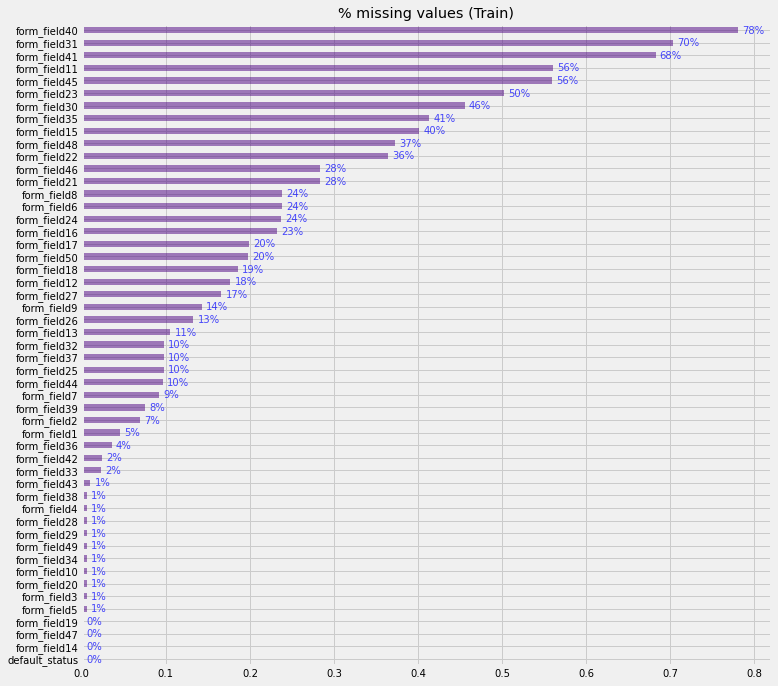

In [11]:
ax = train_le.isna().sum().transform(lambda x:x/train_le.shape[0]).sort_values().plot.barh(figsize=(11,11), 
                                                                                           title='% missing values (Train)',
                                                                                           color='indigo', alpha=0.5)
for i in ax.patches:
    ax.text(i.get_width()+0.005, i.get_y(), 
            str(int(round(i.get_width(),2)*100))+'%',  
            fontsize=10, color='b', alpha=0.7);

clearly from the Bar chart, there's a lot of missing values in the train data

Text(0.005, -0.25, '0%')

Text(0.005, 0.75, '0%')

Text(0.005, 1.75, '0%')

Text(0.011083333333333334, 2.75, '1%')

Text(0.011083333333333334, 3.75, '1%')

Text(0.011083333333333334, 4.75, '1%')

Text(0.011083333333333334, 5.75, '1%')

Text(0.011125, 6.75, '1%')

Text(0.011125, 7.75, '1%')

Text(0.011125, 8.75, '1%')

Text(0.011125, 9.75, '1%')

Text(0.011125, 10.75, '1%')

Text(0.011125, 11.75, '1%')

Text(0.015416666666666665, 12.75, '1%')

Text(0.025625000000000002, 13.75, '2%')

Text(0.029083333333333336, 14.75, '2%')

Text(0.042624999999999996, 15.75, '4%')

Text(0.05125, 16.75, '5%')

Text(0.07620833333333334, 17.75, '7%')

Text(0.08120833333333334, 18.75, '8%')

Text(0.09795833333333334, 19.75, '9%')

Text(0.099, 20.75, '9%')

Text(0.099, 21.75, '9%')

Text(0.099, 22.75, '9%')

Text(0.10341666666666667, 23.75, '10%')

Text(0.107625, 24.75, '10%')

Text(0.13716666666666666, 25.75, '13%')

Text(0.14666666666666667, 26.75, '14%')

Text(0.16791666666666666, 27.75, '16%')

Text(0.17929166666666668, 28.75, '17%')

Text(0.18704166666666666, 29.75, '18%')

Text(0.200625, 30.75, '20%')

Text(0.204875, 31.75, '20%')

Text(0.23308333333333334, 32.75, '23%')

Text(0.23850000000000002, 33.75, '23%')

Text(0.23850000000000002, 34.75, '23%')

Text(0.23854166666666668, 35.75, '23%')

Text(0.2844583333333333, 36.75, '28%')

Text(0.291875, 37.75, '28%')

Text(0.3685, 38.75, '36%')

Text(0.37675000000000003, 39.75, '37%')

Text(0.4046666666666667, 40.75, '40%')

Text(0.41608333333333336, 41.75, '41%')

Text(0.4595, 42.75, '45%')

Text(0.5102083333333334, 43.75, '51%')

Text(0.56325, 44.75, '56%')

Text(0.5690833333333334, 45.75, '56%')

Text(0.6862083333333333, 46.75, '68%')

Text(0.7054166666666667, 47.75, '70%')

Text(0.7895, 48.75, '78%')

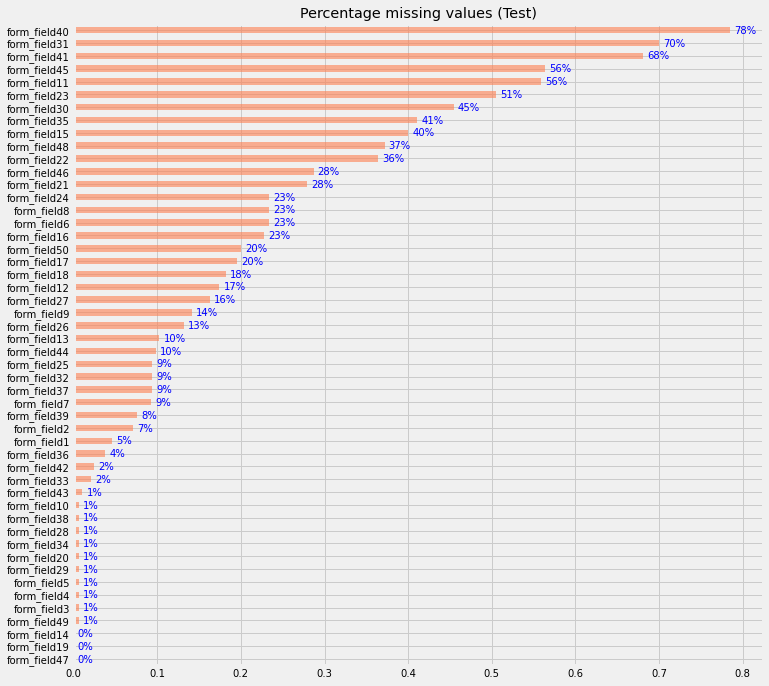

In [12]:
ax1 = test_le.isna().sum().transform(lambda x:x/test_le.shape[0]).sort_values().plot.barh(
    figsize=(11,11), title='Percentage missing values (Test)', color='coral', alpha=0.6)
for i in ax1.patches:
    ax1.text(i.get_width()+0.005, i.get_y(), 
             str(int(round(i.get_width(),2)*100))+'%', fontsize=10, color='blue');

Clearly we can see that both the train and test data have a lot of missing values.

Form_field40 has the most, with almost 80% missing, followed by form_field31 and then form_field41.


### Target Distribution

([<matplotlib.axis.XTick at 0x7f7f680a4650>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

Text(0.5, 1.0, 'Target Distribution')

Text(-0.12, 42288, '75.51%')

Text(0.88, 13718, '24.49%')

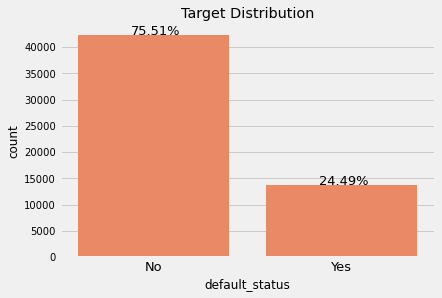

In [14]:
ax = sns.countplot('default_status', data=train_le,color='coral')
plt.xticks(range(2), ['No', 'Yes'], fontsize=13)
plt.title('Target Distribution')

for i in ax.patches:
    ax.text(i.get_x()+ 0.28, i.get_height()+ 3, 
            str(round(i.get_height()/train_le.shape[0] * 100,2))+'%', 
            fontsize=13);

Clearly as we can see, the data is imbalanced.About 74% of the data is for No, while 24% for Yes

### Filling Missing Values with -999

In [15]:
train_le.fillna(-999, inplace=True)
test_le.fillna(-999, inplace=True)